In [1]:
# Step 1: Import pandas
import pandas as pd

# Step 2: Load CSV from URL
url = 'https://raw.githubusercontent.com/egorpol/beat_it/refs/heads/main/csv/vision_onsets_librosa_manual_filtered.csv'
df = pd.read_csv(url)

# Step 3: Display the first few rows of the DataFrame
display(df)


,TIME,LABEL
0,0.103039,NaN
1,0.473107,NaN
2,0.561633,NaN
3,0.703855,NaN
4,0.799637,NaN
...,...,...
544,72.286621,NaN
545,72.340317,NaN
546,72.504308,NaN
547,72.862766,NaN


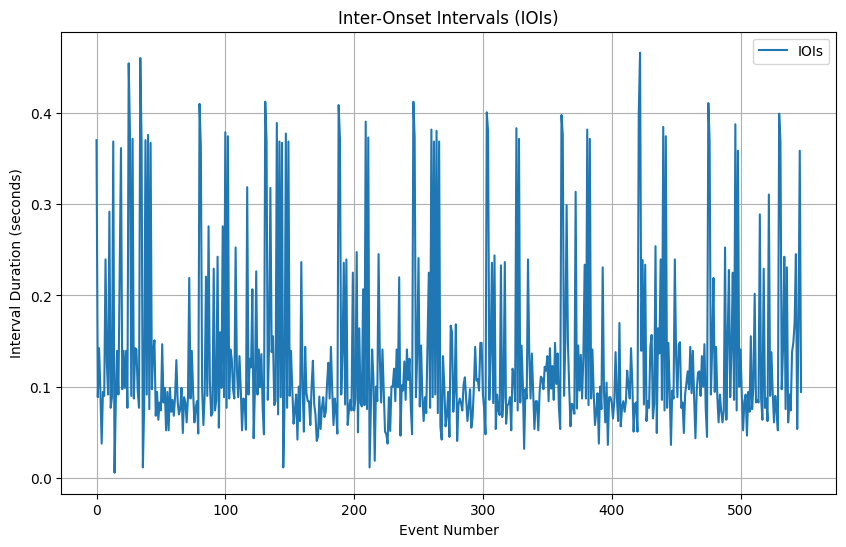

Mean IOI (Average Interval Duration): 0.13294536306021898
Standard Deviation of IOIs: 0.09630875153802732
Coefficient of Variation of IOIs: 0.7244235475471473


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Onset times in seconds
onset_times = df['TIME'].values

# Calculate inter-onset intervals (IOIs)
iois = np.diff(onset_times)

# Plot the IOIs
plt.figure(figsize=(10, 6))
plt.plot(iois, label="IOIs")
plt.title('Inter-Onset Intervals (IOIs)')
plt.xlabel('Event Number')
plt.ylabel('Interval Duration (seconds)')
plt.grid(True)
plt.legend()
plt.show()

# Calculate standard deviation and coefficient of variation
mean_ioi = np.mean(iois)
std_ioi = np.std(iois)
cv_ioi = std_ioi / mean_ioi  # Coefficient of variation

# Print out results with descriptions
print("Mean IOI (Average Interval Duration):", mean_ioi)
print("Standard Deviation of IOIs:", std_ioi)
print("Coefficient of Variation of IOIs:", cv_ioi)


In [4]:
print(iois)

[0.37006803 0.08852608 0.14222222 0.09578231 0.03773243 0.09433106
 0.08997733 0.23945578 0.12770975 0.09142857 0.29170068 0.0769161
 0.08852608 0.36861678 0.00580499 0.08562358 0.13931973 0.09142857
 0.22784581 0.36136054 0.09723356 0.13931973 0.09868481 0.13931973
 0.0769161  0.45424036 0.37587302 0.08997732 0.37151927 0.08707483
 0.14222222 0.14077097 0.09578231 0.0769161  0.46004535 0.36716553
 0.01160998 0.07836735 0.37006803 0.09142857 0.37587302 0.07546485
 0.36716553 0.09723356 0.13931973 0.1509297  0.06820862 0.09433107
 0.06385488 0.08272109 0.07401361 0.14657596 0.08272109 0.09868481
 0.0522449  0.09433107 0.0522449  0.09868481 0.07256236 0.08562358
 0.06820862 0.08852608 0.129161   0.08417233 0.06965986 0.07546485
 0.09868481 0.0493424  0.08852608 0.08272109 0.06095238 0.08852608
 0.21913832 0.08707483 0.13931973 0.09433107 0.06095238 0.0769161
 0.08417233 0.04879819 0.40979592 0.36281179 0.09723356 0.05804989
 0.09142857 0.22058957 0.08997732 0.27573696 0.10594104 0.068208

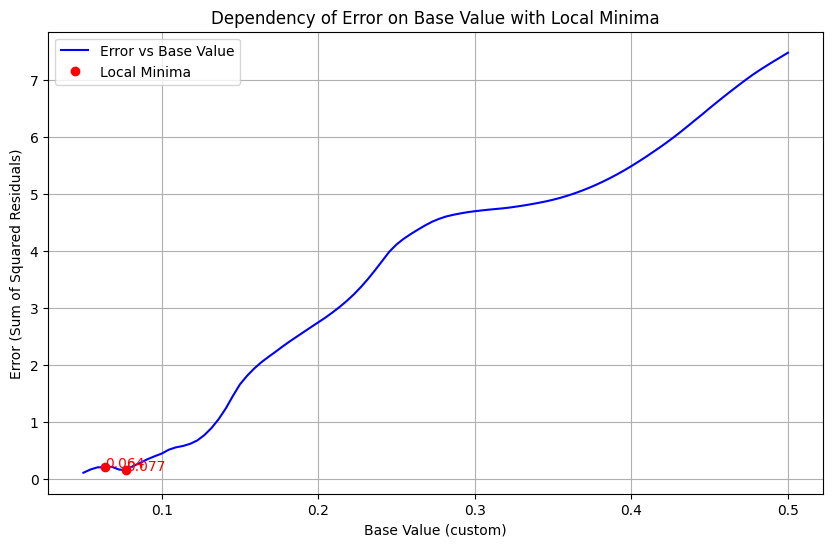

Local minima (base values) and corresponding errors:
Base Value: 0.06364, Error: 0.20322
Base Value: 0.07727, Error: 0.15710


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Example data (replace with actual data)
data = iois

# Define a range of base values to explore
base_values = np.linspace(0.05, 0.5, 100)  # Adjust range if needed

# Initialize an empty list to store the errors
errors = []

# Loop through different base values and compute the error for each
for base_value_custom in base_values:
    # Calculate multipliers and reconstructed data
    multipliers = np.round(data / base_value_custom)
    reconstructed_data = base_value_custom * multipliers

    # Calculate the residuals and error (sum of squared residuals)
    residuals = data - reconstructed_data
    error = np.sum(residuals**2)

    # Append the error to the list
    errors.append(error)

# Convert errors to a numpy array for further processing
errors = np.array(errors)

# Find local minima (by finding peaks of the negative error array)
minima_indices, _ = find_peaks(-errors)

# Plotting the dependency of the error on the base_value_custom
plt.figure(figsize=(10, 6))
plt.plot(base_values, errors, label='Error vs Base Value', color='blue')

# Mark the local minima
plt.plot(base_values[minima_indices], errors[minima_indices], 'ro', label='Local Minima')

# Annotate the local minima on the plot
for idx in minima_indices:
    plt.text(base_values[idx], errors[idx], f'{base_values[idx]:.3f}', color='red')

plt.title('Dependency of Error on Base Value with Local Minima')
plt.xlabel('Base Value (custom)')
plt.ylabel('Error (Sum of Squared Residuals)')
plt.grid(True)
plt.legend()
plt.show()

# Print out the local minima values
print("Local minima (base values) and corresponding errors:")
for idx in minima_indices:
    print(f"Base Value: {base_values[idx]:.5f}, Error: {errors[idx]:.5f}")
